# Trainig on Germany Temperature dataset for practice
Weather Station at the Max-Planck-Institute for Biogeochemistry in Jena, Germany: http://www.bgc-jena.mpg.de/wetter/.




Source :-https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/6.3-advanced-usage-of-recurrent-neural-networks.ipynb

In [86]:
!wget http://www.bgc-jena.mpg.de/~mheimann/weather/Daily_Temperatures_Jena.xls

--2019-04-28 19:10:40--  http://www.bgc-jena.mpg.de/~mheimann/weather/Daily_Temperatures_Jena.xls
Resolving www.bgc-jena.mpg.de (www.bgc-jena.mpg.de)... 195.37.229.23
Connecting to www.bgc-jena.mpg.de (www.bgc-jena.mpg.de)|195.37.229.23|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10892800 (10M) [application/vnd.ms-excel]
Saving to: ‘Daily_Temperatures_Jena.xls.1’

Daily_Temperatures_ 100%[===================>]  10.39M   415KB/s    in 26s     

2019-04-28 19:11:07 (410 KB/s) - ‘Daily_Temperatures_Jena.xls.1’ saved [10892800/10892800]



In [0]:
import pandas as pd


data = pd.read_excel('/content/Daily_Temperatures_Jena.xls',sheet_name = 2)




In [88]:
data['Year'].count()

7057

In [0]:
data.head()

In [0]:
print('preparing data from year 2000')

import matplotlib.pyplot as plt


st = 'Tmax'
plt.plot(data[st].values)

data[st].min()


df = data[data.Tmean != -999]

print('removinng outliners ')

In [0]:
plt.plot(df['Tmean'])

In [0]:
print(df['Tmean'].iloc[0:11])
print(df['Tmean'].iloc[10])

In [0]:
#normalize data

mean = df['Tmean'].mean()
std = df['Tmean'].std()


print(mean,std)


df['Nom_Tmean'] = (df['Tmean']-mean)/std

In [0]:
df.head()

In [0]:
import numpy as np
#get data in batch_size * time_stamp * seq format 

time_step = 10 # take values of d past 10 days and try to predict d value of 10 + 1 day

dim = 1 # take value of i day

batch_size = df['Nom_Tmean'].count()

#shaping dataste

x = []
y = []
for i in range(batch_size - time_step):
  
  
  x.append(df['Nom_Tmean'].iloc[i:i+time_step])
  y.append(df['Nom_Tmean'].iloc[i+time_step])
  
  

x = np.array(x).reshape(-1,time_step,dim)
y = np.array(y)

print(x.shape)
print(y.shape)

In [0]:
plt.plot(x.reshape(-1,10))

In [0]:
plt.plot(y)

In [0]:
print('splitting grain and test split')

num = int(len(x) * 0.8)
train_x = x[:num]
test_x = x[num:]

print(train_x.shape,test_x.shape)

train_y = y[:num]
test_y = y[num:]



print(train_y.shape,test_y.shape)




In [0]:


# from sklearn.model_selection import train_test_split

# train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.2)



In [0]:
print(train_x.shape)
print(test_x.shape)

In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.LSTM(32, input_shape=(time_step,1),dropout = 0.2, recurrent_dropout = 0.2))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

model.summary()                          

In [0]:
model.get_input_shape_at(0)

In [0]:
history = model.fit(train_x,train_y,
#                               steps_per_eochs = 200,
                              epochs=30
                    ,
                              validation_data=(test_x,test_y)
#                     ,validation_steps = 100 
                )

In [0]:
plt.plot(train_x.reshape(-1,10))

In [0]:
plt.plot(model.predict(train_x),c = 'r')

In [0]:
model.evaluate(train_x,train_y)

In [0]:
train_y[0]

In [0]:
model.predict(np.expand_dims(train_x[0],axis = 0))

#Traning on INDIAN TEMPERTURE 

source : kaggle datase   https://www.kaggle.com/data/27099

http://academic.udayton.edu/kissock/http/Weather/gsod95-current/INBOMBAY.txt


In [80]:
!wget http://academic.udayton.edu/kissock/http/Weather/gsod95-current/INBOMBAY.txt

--2019-04-28 19:10:15--  http://academic.udayton.edu/kissock/http/Weather/gsod95-current/INBOMBAY.txt
Resolving academic.udayton.edu (academic.udayton.edu)... 131.238.16.100
Connecting to academic.udayton.edu (academic.udayton.edu)|131.238.16.100|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 426182 (416K) [text/plain]
Saving to: ‘INBOMBAY.txt.1’

INBOMBAY.txt.1      100%[===================>] 416.19K  1.13MB/s    in 0.4s    

2019-04-28 19:10:15 (1.13 MB/s) - ‘INBOMBAY.txt.1’ saved [426182/426182]



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [82]:
indian_data = pd.read_fwf('/content/INBOMBAY.txt',header = None)
indian_data.columns = ['Month','Day','Year',
                     'Temp(F)']

indian_data.head()

,Month,Day,Year,Temp(F)
0,1,1,1995,71.8
1,1,2,1995,72.0
2,1,3,1995,70.3
3,1,4,1995,69.7
4,1,5,1995,71.3


In [83]:
indian_data.describe()

,Month,Day,Year,Temp(F)
count,8879.000000,8879.000000,8879.000000,8879.000000
mean,3.983669,15.718775,2006.658295,81.555716
std,2.821302,8.797801,7.018956,10.345225
min,1.000000,1.000000,1995.000000,-99.000000
25%,1.000000,8.000000,2001.000000,79.900000
50%,3.000000,16.000000,2007.000000,82.500000
75%,6.000000,23.000000,2013.000000,84.700000
max,9.000000,31.000000,2019.000000,92.600000


In [84]:
print('conveerting indian temperature from fahrenhite to celsius')

# c = 0.8 * f -32

indian_data['Temp_c'] = 0.8 * indian_data['Temp(F)'] - 32




conveerting indian temperature from fahrenhite to celsius


In [85]:
indian_data.head()

,Month,Day,Year,Temp(F),Temp_c
0,1,1,1995,71.8,25.44
1,1,2,1995,72.0,25.60
2,1,3,1995,70.3,24.24
3,1,4,1995,69.7,23.76
4,1,5,1995,71.3,25.04


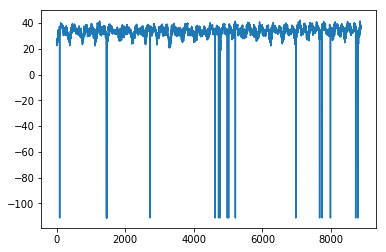

In [16]:
plt.plot(indian_data['Temp_c'])

In [17]:
print('removing outlinears')
print('removing all values below 25 degrees becz. tmp does not go below that in out area')


tmp_data = indian_data[indian_data.Temp_c > 24]




removing outlinears
removing all values below 25 degrees becz. tmp does not go below that in out area


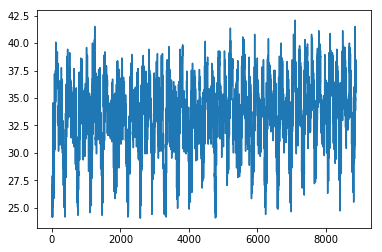

In [18]:
plt.plot(tmp_data['Temp_c'])

In [19]:
print('taking data of past 3 yeras')

data  = tmp_data[tmp_data.Year > 2015]


taking data of past 3 yeras


In [20]:
data.head()

,Month,Day,Year,Temp(F),Temp_c
7671,1,1,2016,83.5,34.80
7672,1,2,2016,80.4,32.32
7673,1,3,2016,78.5,30.80
7674,1,4,2016,80.8,32.64
7675,1,5,2016,81.2,32.96


In [21]:
data.reset_index(inplace = True)
data.drop(['index'],axis =1,inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [22]:
data.head()

,Month,Day,Year,Temp(F),Temp_c
0,1,1,2016,83.5,34.80
1,1,2,2016,80.4,32.32
2,1,3,2016,78.5,30.80
3,1,4,2016,80.8,32.64
4,1,5,2016,81.2,32.96


In [23]:
data.describe()

,Month,Day,Year,Temp(F),Temp_c
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,3.868443,15.650291,2017.181515,83.091091,34.472873
std,2.758806,8.795507,0.968861,3.591099,2.872880
min,1.000000,1.000000,2016.000000,70.900000,24.720000
25%,1.000000,8.000000,2016.000000,80.900000,32.720000
50%,3.000000,16.000000,2017.000000,83.200000,34.560000
75%,6.000000,23.000000,2018.000000,85.700000,36.560000
max,9.000000,31.000000,2019.000000,91.900000,41.520000


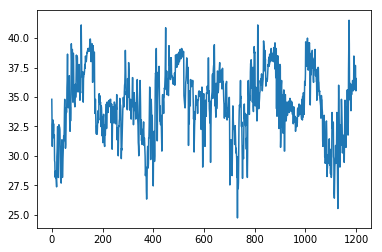

In [24]:
plt.plot(data['Temp_c'])

In [25]:
#normalize data

mean = data['Temp_c'].mean()
std = data['Temp_c'].std()


print(mean,std)


data['Temp_c_norm'] = (data['Temp_c']-mean)/std

34.472872606161545 2.8728795933564566


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [26]:
print('preparing data')

import numpy as np
#get data in batch_size * time_stamp * seq format 

time_step = 5 # take values of d past 5 days and try to predict d value of 5 + 1 day

dim = 1 # take value of i day

batch_size = data['Temp_c_norm'].count()

#shaping dataste

x = []
y = []
for i in range(batch_size - time_step):
  
  
  x.append(data['Temp_c_norm'].iloc[i:i+time_step])
  y.append(data['Temp_c_norm'].iloc[i+time_step])
  
  

x = np.array(x).reshape(-1,time_step,dim)
y = np.array(y)

print(x.shape)
print(y.shape)


preparing data
(1196, 5, 1)
(1196,)


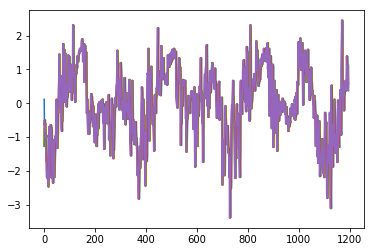

In [27]:
plt.plot(x.reshape(-1,5))

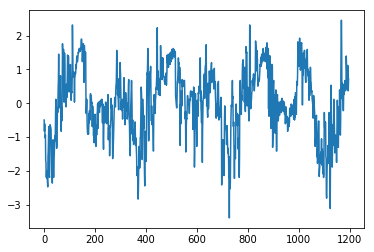

In [28]:
plt.plot(y)

In [29]:
#splitting d data

num = int(x.shape[0] * 0.8)


train_x = x[:num]
test_x = x[num:]


train_y = y[:num]
test_y = y[num:]


print(train_x.shape,test_x.shape)


(956, 5, 1) (240, 5, 1)


In [75]:
#traning the model
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.LSTM(64, input_shape=(time_step,1),dropout = 0.2 , recurrent_dropout = 0.2,return_sequences = True))
model.add(layers.LSTM(64,dropout = 0.3 , recurrent_dropout = 0.3,return_sequences = False))
# model.add(layers.LSTM(256,dropout = 0.2 , recurrent_dropout = 0.2))

model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mse')

model.summary()                 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 5, 64)             16896     
_________________________________________________________________
lstm_16 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________


In [76]:
history = model.fit(train_x,train_y,
#                               steps_per_eochs = 200,
                              epochs=50
                    ,
                              validation_data=(test_x,test_y)
#                     ,validation_steps = 100 
                )

Train on 956 samples, validate on 240 samples
Epoch 1/50
956/956 [==============================] - 5s 5ms/step - loss: 0.5558 - val_loss: 0.4840
Epoch 2/50
956/956 [==============================] - 1s 775us/step - loss: 0.4967 - val_loss: 0.4070
Epoch 3/50
956/956 [==============================] - 1s 775us/step - loss: 0.4954 - val_loss: 0.4184
Epoch 4/50
956/956 [==============================] - 1s 777us/step - loss: 0.4772 - val_loss: 0.3848
Epoch 5/50
956/956 [==============================] - 1s 793us/step - loss: 0.4140 - val_loss: 0.3387
Epoch 6/50
956/956 [==============================] - 1s 774us/step - loss: 0.3946 - val_loss: 0.3401
Epoch 7/50
956/956 [==============================] - 1s 781us/step - loss: 0.3810 - val_loss: 0.2821
Epoch 8/50
956/956 [==============================] - 1s 791us/step - loss: 0.3782 - val_loss: 0.3131
Epoch 9/50
956/956 [==============================] - 1s 778us/step - loss: 0.3741 - val_loss: 0.2941
Epoch 10/50
956/956 [=================

#HyperParameter Optimisation

In [0]:
model.save('tmp_pred_final.h5')

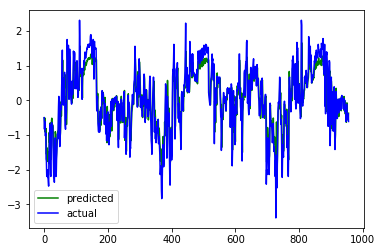

In [54]:
plt.plot(model.predict(train_x),c = 'g',label = 'predicted')

plt.plot(train_y,c = 'b',label = 'actual')

plt.legend()

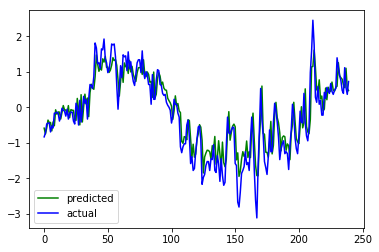

In [34]:
plt.plot(model.predict(test_x),c = 'g',label = 'predicted')

plt.plot(test_y,c = 'b',label = 'actual')

plt.legend()

In [35]:
mean,std

(34.472872606161545, 2.8728795933564566)

In [0]:
def inv_norm(x,mean,std):
  
  return x*std+ mean
  
  
  
  

In [37]:
print('de normalizing to get actual temp. values')


print(data['Temp_c'][num])

print(inv_norm(test_y[0],mean,std))

de normalizing to get actual temp. values
32.96000000000001
32.08


In [38]:
inv_norm(model.predict(np.expand_dims(test_x[0],axis = 0)),mean,std)

array([[32.78519]], dtype=float32)

#Testing on traning data 12 days of April 2019 


In [39]:
data.iloc[1188:]

,Month,Day,Year,Temp(F),Temp_c,Temp_c_norm
1188,4,10,2019,84.4,35.52,0.364487
1189,4,11,2019,84.8,35.84,0.475874
1190,4,12,2019,85.0,36.00,0.531567
1191,4,13,2019,88.1,38.48,1.394812
1192,4,14,2019,87.1,37.68,1.116346
1193,4,15,2019,86.3,37.04,0.893573
1194,4,16,2019,85.8,36.64,0.754340
1195,4,17,2019,84.8,35.84,0.475874
1196,4,18,2019,84.5,35.60,0.392334
1197,4,19,2019,87.1,37.68,1.116346


In [40]:
print(data['Temp_c_norm'][1188:1188+5])

1188    0.364487
1189    0.475874
1190    0.531567
1191    1.394812
1192    1.116346
Name: Temp_c_norm, dtype: float64


In [41]:
print('inputing days from 10 - 14 and expecting value of day 15')
pred = model.predict(data['Temp_c_norm'][1188:1188+5].values.reshape(1,5,1))
p = inv_norm(pred,mean,std)

print('actual value {} and predicted {} '.format(inv_norm(data['Temp_c_norm'][1193],mean,std),p))

inputing days from 10 - 14 and expecting value of day 15
actual value 37.040000000000006 and predicted [[37.040363]] 


#Real World Testing trying to predict the value of 23 April 2019 not a part of Dataset

In [42]:
print('inputing temp from 18 - 22 nd ')
# data['Temp_c_norm'][1196:1196+5]
data.iloc[-5:]

inputing temp from 18 - 22 nd 


,Month,Day,Year,Temp(F),Temp_c,Temp_c_norm
1196,4,18,2019,84.5,35.60,0.392334
1197,4,19,2019,87.1,37.68,1.116346
1198,4,20,2019,85.1,36.08,0.559413
1199,4,21,2019,84.4,35.52,0.364487
1200,4,22,2019,85.7,36.56,0.726493


In [43]:
print('inputing days from 18 - 22 and expecting value of day 23')
pred = model.predict(data['Temp_c_norm'][1196:1196+5].values.reshape(1,5,1))
inv_norm(pred,mean,std)

inputing days from 18 - 22 and expecting value of day 23


array([[36.758698]], dtype=float32)

# so actual temperature of 23 april 2019 was 35 and the prediction was 36.38 

https://www.accuweather.com/en/in/mumbai/204842/april-weather/204842?monyr=4/1/2019&view=table

Notes : 


1.   increasing the dropout rate above 0.2 increases the loss (just keeping to prevent overfitting )
2.   using mse as loss function instead of mae changed the error for 0.3 to 0.2
3.  using more than 2 layer of LStm didnt improve loss .


 

#Trying to predict 24,25,26,27,28,29 april 2019

In [55]:
#preparing input data
n = 1196
lst = []
for  i in range(6):
  
  lst.append(data['Temp_c_norm'][n+i:n+i+time_step].values)
  print(data['Temp_c_norm'][n+i:n+i+time_step].values)
 
  
  
  
  

[0.39233367 1.11634591 0.55941342 0.36448705 0.72649317]
[1.11634591 0.55941342 0.36448705 0.72649317]
[0.55941342 0.36448705 0.72649317]
[0.36448705 0.72649317]
[0.72649317]
[]


In [77]:

preds = []
for i in lst:
  
  if i.shape[0] < 5:
    i = np.append(i,preds)
    
  print(i)  
  preds.append(model.predict(i.reshape(1,time_step,1)))
  
 
  
  

[0.39233367 1.11634591 0.55941342 0.36448705 0.72649317]
[1.11634591 0.55941342 0.36448705 0.72649317 0.65577185]
[0.55941342 0.36448705 0.72649317 0.65577185 0.57968867]
[0.36448705 0.72649317 0.65577185 0.57968867 0.50028574]
[0.72649317 0.65577185 0.57968867 0.50028574 0.4448961 ]
[0.65577185 0.57968867 0.50028574 0.4448961  0.41829675]


In [78]:
days = [23,24,25,26,27,28]
for i in range(6):
  print(inv_norm(preds[i],mean,std),days[i])

[[36.356827]] 23
[[36.13825]] 24
[[35.910133]] 25
[[35.751007]] 26
[[35.67459]] 27
[[35.60093]] 28


In [47]:
i =  10
print('true_value',train_y[i])
print(model.predict(train_x[i].reshape(1,5,1)))

true_value -2.0024760590263075
[[-1.5522137]]


In [0]:
#traning the model
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

def build_model(units_1,units_2,do,do_r):
  model2 = Sequential()
  model2.add(layers.LSTM(units_1, input_shape=(time_step,1),dropout = do , recurrent_dropout = do,return_sequences = True))
  model2.add(layers.LSTM(units_2,dropout = do_r , recurrent_dropout = do_r,return_sequences = False))
  # model.add(layers.LSTM(256,dropout = 0.2 , recurrent_dropout = 0.2))

  model2.add(layers.Dense(1))

  model2.compile(optimizer=RMSprop(), loss='mse')

#   model2.summary()      
  
  history = model2.fit(train_x,train_y,
#                               steps_per_eochs = 200,
                              epochs=50
                    ,
                              validation_data=(test_x,test_y)
#                     ,validation_steps = 100 
                     )
                      
                      
  return history
  

In [49]:
units_1 = [32,64,128,32,256]
units_2 = [64,128,256,32,512]
do = [0.1,0.2,0.3,0.2,0.1]
do_r = [0.2,0.1,0.1,0.3,0.2]


import time
s = time.time()
t_loss = []
for i in range(1):
     
#      t_loss.append(build_model(units_1[i],units_2[i],do[i],do_r[i]))
       build_model(32,32,0.2,0.3)

print('time taken:',time.time() - s)    


Train on 956 samples, validate on 240 samples
Epoch 1/50
956/956 [==============================] - 2s 2ms/step - loss: 0.6290 - val_loss: 0.5048
Epoch 2/50
956/956 [==============================] - 1s 820us/step - loss: 0.5308 - val_loss: 0.4704
Epoch 3/50
956/956 [==============================] - 1s 789us/step - loss: 0.4909 - val_loss: 0.4209
Epoch 4/50
956/956 [==============================] - 1s 767us/step - loss: 0.5014 - val_loss: 0.4366
Epoch 5/50
956/956 [==============================] - 1s 776us/step - loss: 0.4736 - val_loss: 0.3854
Epoch 6/50
956/956 [==============================] - 1s 778us/step - loss: 0.4432 - val_loss: 0.3814
Epoch 7/50
956/956 [==============================] - 1s 771us/step - loss: 0.4287 - val_loss: 0.3875
Epoch 8/50
956/956 [==============================] - 1s 775us/step - loss: 0.4489 - val_loss: 0.3666
Epoch 9/50
956/956 [==============================] - 1s 782us/step - loss: 0.4181 - val_loss: 0.3401
Epoch 10/50
956/956 [=================